<a href="https://colab.research.google.com/github/yash309/MovieRecommendationSystem/blob/master/MovieRecommendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.decomposition import TruncatedSVD
import seaborn as sns

In [3]:
columns = ['user_id', 'movie_id', 'rating', 'timestamp']
frame = pd.read_csv('u.data', sep='\t', names=columns)
frame.head()

,user_id,movie_id,rating,timestamp
0,196,242,3.0,881250949.0
1,186,302,3.0,891717742.0
2,22,377,1.0,878887116.0
3,244,51,2.0,880606923.0
4,166,346,1.0,886397596.0


In [4]:
movies = pd.read_csv('u.item', sep='|', encoding='latin-1')
movies

,1,Toy Story (1995),01-Jan-1995,Unnamed: 3,http://us.imdb.com/M/title-exact?Toy%20Story%20(1995),0,0.1,0.2,1.1,1.2,1.3,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15
0,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
columns = ['movie_id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('u.item', sep='|', names=columns, encoding='latin-1')
movies
movie_names = movies[['movie_id', 'movie title']]
movie_names.head()

,movie_id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
combined_movies_data = pd.merge(frame, movie_names, on='movie_id')
combined_movies_data

,user_id,movie_id,rating,timestamp,movie title
0,196,242,3.0,881250949.0,Kolya (1996)
1,63,242,3.0,875747190.0,Kolya (1996)
2,226,242,5.0,883888671.0,Kolya (1996)
3,154,242,3.0,879138235.0,Kolya (1996)
4,306,242,5.0,876503793.0,Kolya (1996)
...,...,...,...,...,...
53149,13,897,1.0,886952422.0,Time Tracers (1995)
53150,181,1365,1.0,878963086.0,Johnny 100 Pesos (1993)
53151,751,1661,1.0,889299429.0,"New Age, The (1994)"
53152,201,1423,3.0,884140853.0,"Walking Dead, The (1995)"


In [7]:
combined_movies_data.groupby('movie_id')['rating'].count().sort_values(ascending=False).head()

movie_id
50     301
258    279
100    268
288    266
181    259
Name: rating, dtype: int64

In [8]:
combined_movies_data[combined_movies_data['movie_id']==50]['movie title'].unique()

array(['Star Wars (1977)'], dtype=object)

In [25]:
rating_crosstab = combined_movies_data.pivot_table(values='rating', index='user_id', columns='movie title', fill_value=0)
movie_rating = rating_crosstab.T
movie_rating.head()
movie_rating

user_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,798,800,802,803,804
movie title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-900 (1994),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),5.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187 (1997),0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns (1988),3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Young Guns II (1990),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Young Poisoner's Handbook, The (1995)",0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
SVD = TruncatedSVD(n_components=12, random_state=17)
#Use fit method to perform SVD on 'movie_rating'
resultant_matrix = SVD.fit_transform(movie_rating)
resultant_matrix.shape

(1588, 12)

In [36]:
corr_mat = np.corrcoef(resultant_matrix)
corr_mat

array([[ 1.        , -0.12164539,  0.53281702, ..., -0.06586246,
         0.33286626,  0.28116895],
       [-0.12164539,  1.        , -0.06387874, ...,  0.52551622,
         0.00109258,  0.3743962 ],
       [ 0.53281702, -0.06387874,  1.        , ...,  0.27506438,
         0.712101  ,  0.2993151 ],
       ...,
       [-0.06586246,  0.52551622,  0.27506438, ...,  1.        ,
         0.24630576,  0.40587981],
       [ 0.33286626,  0.00109258,  0.712101  , ...,  0.24630576,
         1.        ,  0.04886692],
       [ 0.28116895,  0.3743962 ,  0.2993151 , ...,  0.40587981,
         0.04886692,  1.        ]])

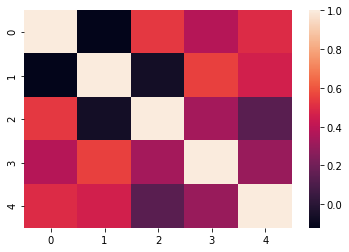

In [38]:
corr_mat[:5,:5]
ax = sns.heatmap(corr_mat[:5,:5],)

In [48]:
movie_names = rating_crosstab.columns
movies_list = list(movie_names)

movie_names

Index([''Til There Was You (1997)', '1-900 (1994)', '101 Dalmatians (1996)',
       '12 Angry Men (1957)', '187 (1997)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '3 Ninjas: High Noon At Mega Mountain (1998)', '39 Steps, The (1935)',
       ...
       'Wrong Trousers, The (1993)', 'Wyatt Earp (1994)', 'Yankee Zulu (1994)',
       'Year of the Horse (1997)', 'Young Frankenstein (1974)',
       'Young Guns (1988)', 'Young Guns II (1990)',
       'Young Poisoner's Handbook, The (1995)', 'Zeus and Roxanne (1997)',
       'unknown'],
      dtype='object', name='movie title', length=1588)

In [50]:
movies_list

["'Til There Was You (1997)",
 '1-900 (1994)',
 '101 Dalmatians (1996)',
 '12 Angry Men (1957)',
 '187 (1997)',
 '2 Days in the Valley (1996)',
 '20,000 Leagues Under the Sea (1954)',
 '2001: A Space Odyssey (1968)',
 '3 Ninjas: High Noon At Mega Mountain (1998)',
 '39 Steps, The (1935)',
 '8 1/2 (1963)',
 '8 Seconds (1994)',
 'A Chef in Love (1996)',
 'Above the Rim (1994)',
 'Absolute Power (1997)',
 'Abyss, The (1989)',
 'Ace Ventura: Pet Detective (1994)',
 'Ace Ventura: When Nature Calls (1995)',
 'Across the Sea of Time (1995)',
 'Addams Family Values (1993)',
 'Addicted to Love (1997)',
 'Addiction, The (1995)',
 'Adventures of Pinocchio, The (1996)',
 'Adventures of Priscilla, Queen of the Desert, The (1994)',
 'Adventures of Robin Hood, The (1938)',
 'Affair to Remember, An (1957)',
 'African Queen, The (1951)',
 'Afterglow (1997)',
 'Age of Innocence, The (1993)',
 'Aiqing wansui (1994)',
 'Air Bud (1997)',
 'Air Force One (1997)',
 'Air Up There, The (1994)',
 'Airheads (199

In [51]:
index=movies_list.index('Mixed Nuts (1994)')
corr_star_wars = corr_mat[index]
corr_star_wars

array([0.17211344, 0.37324046, 0.36885953, ..., 0.41234904, 0.00301718,
       0.66301892])

In [54]:
print(*list(movie_names[(corr_star_wars < 1.0) & (corr_star_wars > 0.9)]))

Bad Girls (1994) Coneheads (1993) Exit to Eden (1994) Herbie Rides Again (1974) Ready to Wear (Pret-A-Porter) (1994) Up in Smoke (1978)
